In [1]:
import pandas as pd

In [2]:
#lendo os dados
data = pd.read_csv('Pasta1.csv', sep=';')
data.head()

,tam_pedido_cx,tam_pedido_garrafas,distancia,qte_entregas
0,6,143,166,4
1,21,503,234,12
2,5,118,283,4
3,29,690,408,16
4,27,648,324,14


In [3]:
# estatisticas descritivas
data.describe().round(2)

,tam_pedido_cx,tam_pedido_garrafas,distancia,qte_entregas
count,40.00,40.00,40.00,40.00
mean,15.85,377.58,263.18,8.80
std,8.96,215.37,110.03,4.37
min,1.00,18.00,83.00,2.00
25%,8.75,205.75,166.75,5.50
50%,16.50,391.00,254.00,9.00
75%,22.25,533.25,337.75,12.00
max,29.00,694.00,461.00,16.00


In [4]:
# matriz de correlacao
# associacao linear entre as variavaeis
data.corr().round(4)
# +1 associacao positiva perfeita
# -1 associacao negativa perfeita
# 0 sem associacao

,tam_pedido_cx,tam_pedido_garrafas,distancia,qte_entregas
tam_pedido_cx,1.0000,1.0000,0.4980,0.9919
tam_pedido_garrafas,1.0000,1.0000,0.4953,0.9916
distancia,0.4980,0.4953,1.0000,0.5102
qte_entregas,0.9919,0.9916,0.5102,1.0000


<AxesSubplot:xlabel='qte_entregas'>

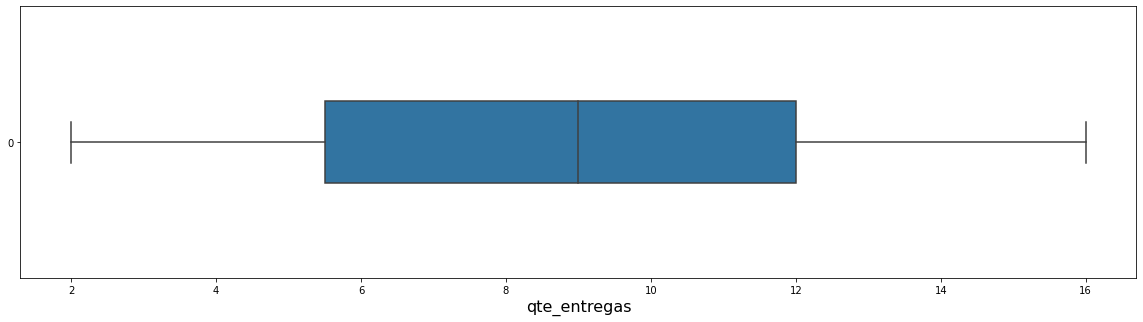

In [5]:
import seaborn as sns

# box plot

ax = sns.boxplot(data=data['qte_entregas'], orient='h', width=0.3)

ax.figure.set_size_inches(20,5)
#ax.set_title('Preço dos Imóveis',  fontsize=20)
ax.set_xlabel('qte_entregas', fontsize=16)
ax

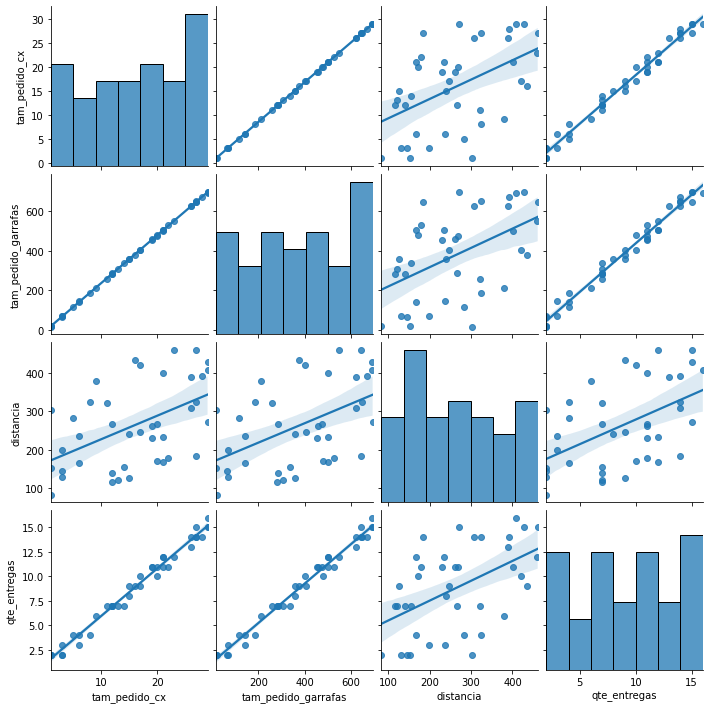

In [6]:
#observando correlacoes
ax = sns.pairplot(data, kind='reg')

In [7]:
# importanto libs para regressao linear
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [8]:
#criando modelos
modelo = LinearRegression()

In [9]:
#passagem das variáveis dependentes e independentes
x = data[['tam_pedido_cx', 'tam_pedido_garrafas', 'distancia']]
y = data[['qte_entregas']]

In [10]:
# ajuste do modelo
modelo.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# qualidade do modelo por r2
print('r2 = {}'.format(modelo.score(x, y).round(2)))

r2 = 0.98


In [12]:
## buscando uma análise mais robusta
import statsmodels.api as sm

In [13]:
#regressão feita pelos minimos quadrados
modelo_statsmodels = sm.OLS(y, x, hasconst = True).fit()

In [14]:
## avaliando o modelo estimado
modelo_statsmodels.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           qte_entregas   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     901.9
Date:                Mon, 03 May 2021   Prob (F-statistic):           4.06e-32
Time:                        12:00:51   Log-Likelihood:                -37.144
No. Observations:                  40   AIC:                             80.29
Df Residuals:                      37   BIC:                             85.35
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
tam_pedido_cx           3.1843      1.190      2.676      0.011       0.773       5.596
tam_pedido_garrafas    -0.1120      0.049     -2.263      0.030      -0.212      -0.012
distancia               0.0019      0.001      1.857      0.071      -0.000       0.004
==============================================================================
Omnibus:                        2.021   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.364   Jarque-Bera (JB):                1.221
Skew:                           0.043   Prob(JB):                        0.543
Kurtosis:                       2.148   Cond. No.                     6.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
# r2 = 0.980 mt bom
# se ja tivesse baixo seria ruim
# r2 ajustado leva em conta o num de vars

# r2 somente sobe...r2 ajustado se vc abusa do
# overfitting ele cai

# teste F testa todos os parametros conjuntamente
# ele eh signficativo (<0.05) neste caso!

# F indica se eh um bom fit usanto todas as vars em conjunto

#paramentros individuais
# vamos olhar o teste T

#tem que ser <0.05 pra ser signficativo
# todos passam

In [16]:
# poderiamos entao ter eliminado parametros não signficativos (1o corte)


# mas descobrimos que há variáveis com GRANDE correlação ('tam_pedido_cx', 'tam_pedido_garrafas')
# este será nosso 2o corte (+ info = + qualidade SOMENTE se infos não forem redundantes!)

In [17]:
x = data[['tam_pedido_cx', 'distancia']]
y = data[['qte_entregas']]

In [18]:
#minimos quadrados ordinarios
modelo_statsmodels = sm.OLS(y, x, hasconst = True).fit()

## avaliando o modelo estimado
modelo_statsmodels.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           qte_entregas   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     1623.
Date:                Mon, 03 May 2021   Prob (F-statistic):           8.80e-33
Time:                        12:00:51   Log-Likelihood:                -39.737
No. Observations:                  40   AIC:                             83.47
Df Residuals:                      38   BIC:                             86.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
tam_pedido_cx     0.4909      0.013     36.682      0.000       0.464       0.518
distancia         0.0034      0.001      3.944      0.000       0.002       0.005
==============================================================================
Omnibus:                        2.314   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.314   Jarque-Bera (JB):                1.450
Skew:                          -0.190   Prob(JB):                        0.484
Kurtosis:                       2.148   Cond. No.                         36.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# apesar do r2 cair levemente com relação ao anterior, ainda eh mt bom!
# isso nos leva ao racicínio, valeu a pena incluir mais uma variavel 
# so pra melhorar o r2 de 0.977 pra 0.98?

# alem disso signficancia de F melhora agora sem a var redundante
# bem como significancias T individuais

In [20]:
modelo.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
print('r2 = {}'.format(modelo.score(x, y).round(2)))

r2 = 0.98


In [22]:
# model.fit nos gerou uma equacao desse tipo:
# Y = A + B.x1 + C.x2

In [23]:
# entrada teste para verificar nosso modelo preditivo

entrada_teste = {
    'tam_pedido_cx' : [6],
    'distancia' : [155],
}
  
# creating a Dataframe object 
entrada_teste = pd.DataFrame(entrada_teste)
  
entrada_teste

,tam_pedido_cx,distancia
0,6,155


In [24]:
modelo.predict(entrada_teste)

array([[3.98708158]])

In [25]:
print('São estimadas {} qte_entregas para esse pedido'.format(modelo.predict(entrada_teste)[0][0].round(3)))

São estimadas 3.987 qte_entregas para esse pedido


In [26]:
# interpretando os coeficientes estimados

In [27]:
# obtendo o intercepto do modelo
# efeito em Y (qte_entregas) tendo todas as
# variaveis explicativas excluidas do modelo

In [28]:
modelo.intercept_

array([0.97842189])

In [29]:
# outros coefs, medem elasticidade de Y com respeito
# as vars. Quanto varia Y dado uma variacao percentual
# nas variaveis explicativas 

In [30]:
modelo.coef_

array([[0.47913933, 0.00086338]])

In [31]:
#Y = A + B.x1 + C.x2
# qte_entregas = 0.97842189 + (0.47913933*tam_pedido_cx) + (0.00086338*distancia)

In [32]:
# verificando se os coef na equacao sao iguais ao model.predict

tam_pedido_cx = 6
distancia = 155
qte_entregas = 0.97842189 + (0.47913933*tam_pedido_cx) + (0.00086338*distancia)
qte_entregas

3.9870817699999996

In [33]:
# (A) intercepto: excluindo o efeito das variaveis explicativas, todos x nulos,
# o efeito medio na qte_entregas (Y) seria de 0.978 (A)

# (X1) tam_pedido_cx: mantendo-se o valor de X2 (distancia) constante,
# um acrescimo de 1% no tam_pedido_cx gera em media,
# um acrescimo de 0.47913933% (B) na qte_entregas (Y)

# (X2) distancia: mantendo-se X1 (tam_pedido_cx) constante,
# um acrescimo de 1% na distancia, dera em media,
# um acrescimo de 0.00086338% (C) na qte_entregas (Y)

In [34]:
from pandas_profiling import ProfileReport

In [35]:
profile = ProfileReport(data, title='Profiling DataFrame',html={'style':{'full_width':True}})

In [36]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]